## Trabajo 2: Clustering
### Máster Interuniversitario en Big Data: Tecnologías de Análisis de Datos Masivos
### Minería de datos - Curso 2023/2024

El alumno deberá resolver las cuestiones que se plantean. Una vez resueltas, deberá entregar el Jupyter Notebook con los comentarios en formato Markdown con el código incrustado y la salida en formato HTML, en la que quede reflejado el proceso de resolución seguido. Además de la corrección de las soluciones propuestas, se valorará la presentación de la memoria y la justificación a las decisiones tomadas. 

Los archivos que entregar se comprimirán en un fichero .ZIP con nombre ApellidosNombre.zip. El nombre de los alumnos que componen el grupo debe aparecer claramente identificados al principio de la memoria. 

### Conjunto de datos

En este trabajo se usarán 6 conjuntos de datos para analizar la capacidad de distintos algoritmos de agrupamiento: 

**Integrantes del grupo:**

- Alicia Jiajun Lorenzo Lourido
- Monya Tayebi Hillali

In [1]:
# pip install scikit-learn-extra

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

%matplotlib inline

In [3]:
path_data="./data/"

data1 = pd.read_csv(path_data+"data1.csv")
data2 = pd.read_csv(path_data+"data2.csv")
data3 = pd.read_csv(path_data+"data3.csv")
data4 = pd.read_csv(path_data+"data4.csv")
data5 = pd.read_csv(path_data+"data5.csv")
data6 = pd.read_csv(path_data+"data6.csv")

datos= [pd.read_csv(path_data+f"data{i}.csv") for i in range(1,7)]
datos={
    0:data1,
    1:data2,
    2:data3,
    3:data4,
    4:data5,
    5:data6
}

Se puede observar que los datos están agrupados en distintas formas geométricas:

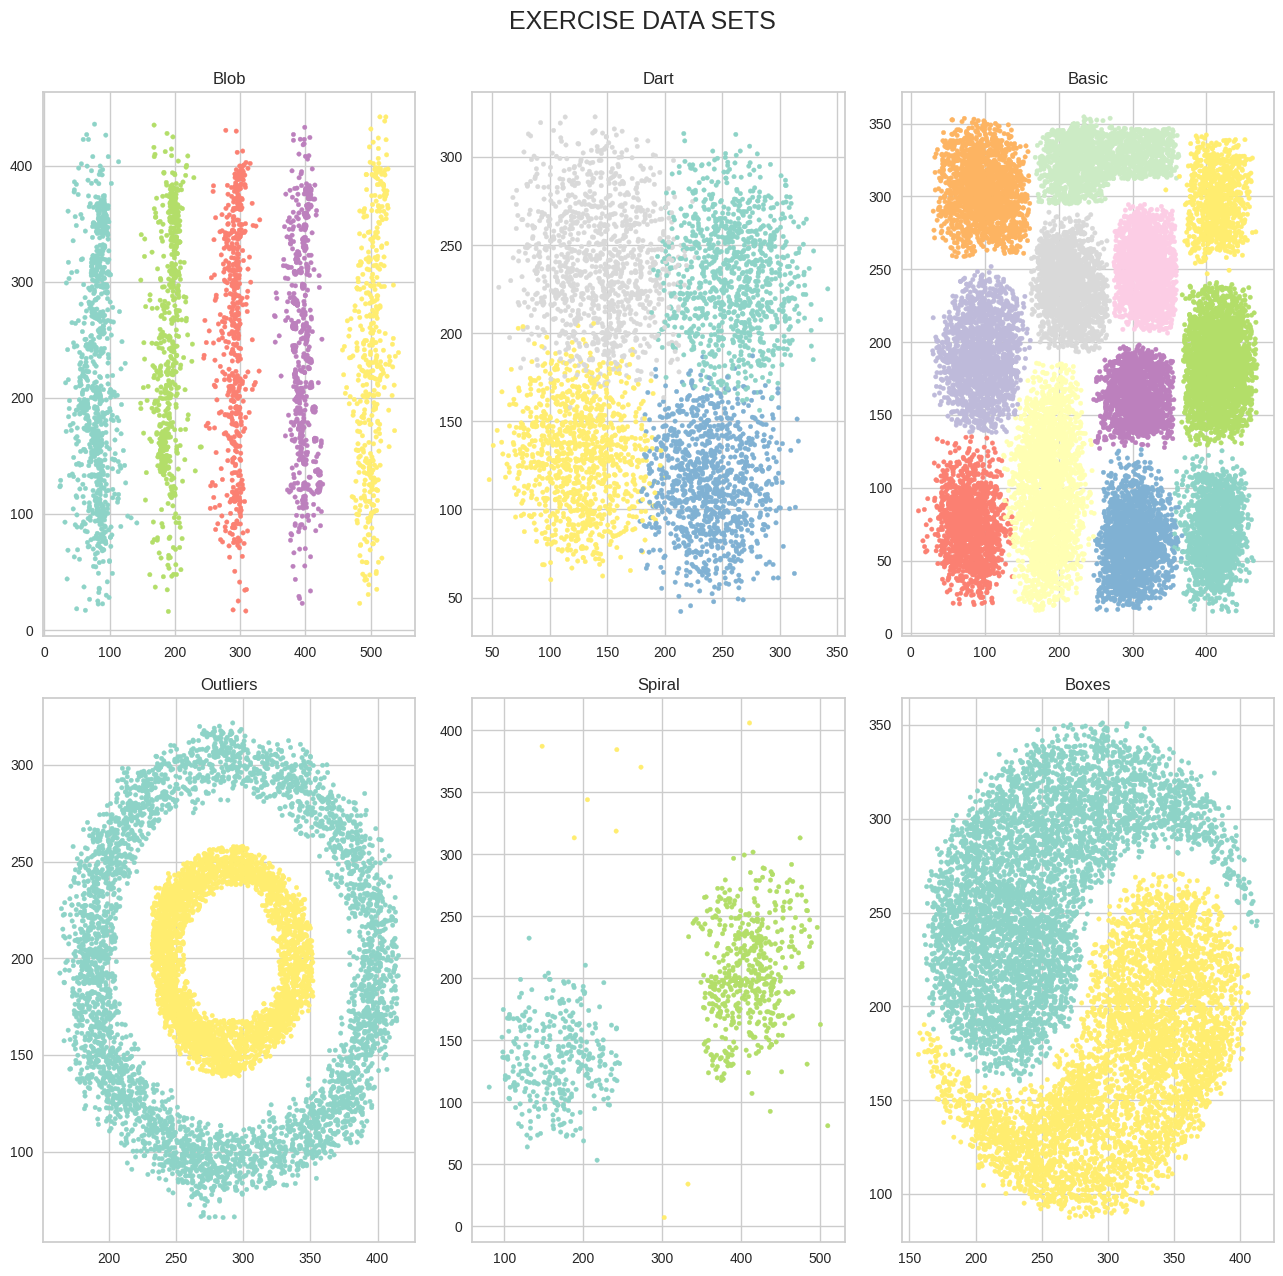

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

axes[0,0].scatter(data1['x'], data1['y'], c=data1['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(data2['x'], data2['y'], c=data2['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(data3['x'], data3['y'], c=data3['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(data4['x'], data4['y'], c=data4['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(data5['x'], data5['y'], c=data5['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(data6['x'], data6['y'], c=data6['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

In [ ]:
eps_selected=[[18],[8.5],[5.6],[5],[36],[4.7]]


### Ejercicio 1

Agrupa cada uno de los conjuntos de datos anteriores utilizando el k-medias (usa la implementación de scikit-learn). Optimiza la k utilizando el métodos del codo y el método Silhouette. 

Compara los resultados gráficamente respecto a los valores obtenidos por el conjunto de datos inicial. 

**Comentario:** Comenzamos definiendo un método para aplicar KMeans sobre el conjunto y agrupar en los k grupos que se obtengan por el método del codo o el método de Silhouette:

In [5]:
from scipy.signal import argrelextrema

def k_mean(data,metric='distortion',name='',max_iter=100):
    """
    Ags:
        metric, default: "distortion"
        Select the scoring metric to evaluate the clusters. The default is the mean distortion, defined by the sum of squared distances between each observation and its closest centroid. Other metrics include:
            distortion: mean sum of squared distances to centers
            silhouette: mean ratio of intra-cluster and nearest-cluster distance
            calinski_harabasz: ratio of within to between cluster dispersion
    """
    print(name)
    model = KMeans(max_iter=max_iter, init='random', n_init='auto', random_state=0)
    visualizer = KElbowVisualizer(model, k=(2,20), metric=metric)
    visualizer.fit(data)
    visualizer.show()
    if metric=="silhouette":
        argrelextrema(np.array(visualizer.k_scores_), np.greater)
        return visualizer.elbow_value_
    else:
        return visualizer.elbow_value_

In [6]:
#j=2
#k_for_data['silhouette']=k_mean(datos[j],metric='silhouette',name=f"data_{j}_silhouette")

**Comentario:** A continuación, para cada uno de los conjuntos de datos agrupamos usando KMeans y visualizamos las gráficas tanto para el método del codo como de Silhouette:

data_1_codo


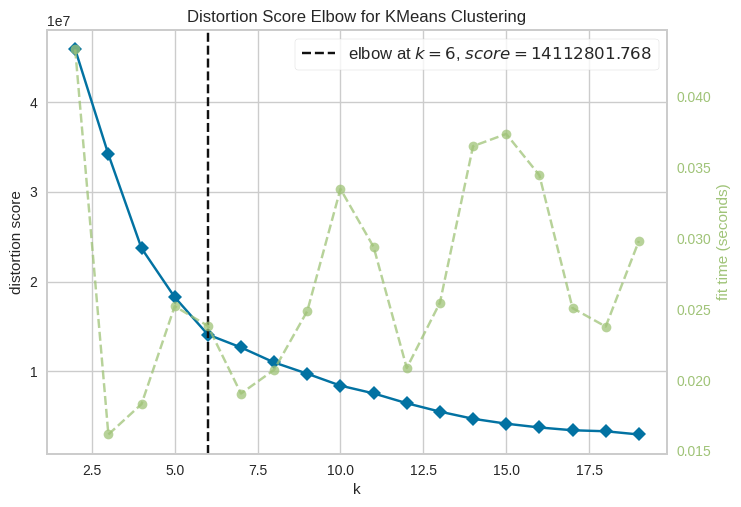

data_1_silhouette


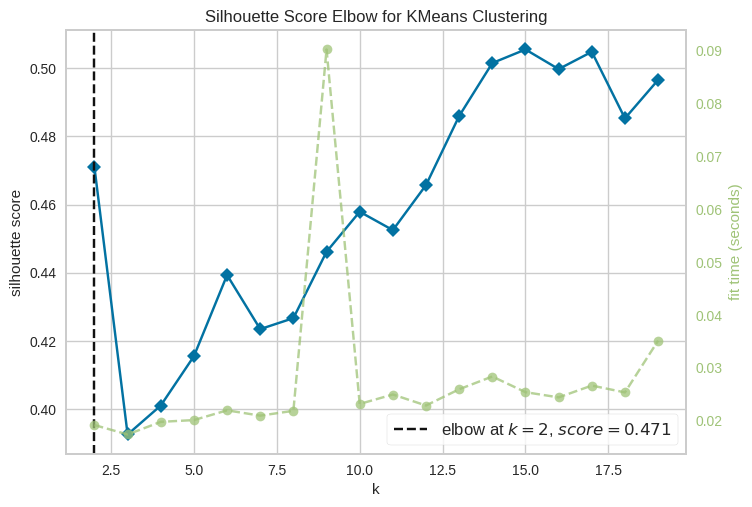

data_2_codo


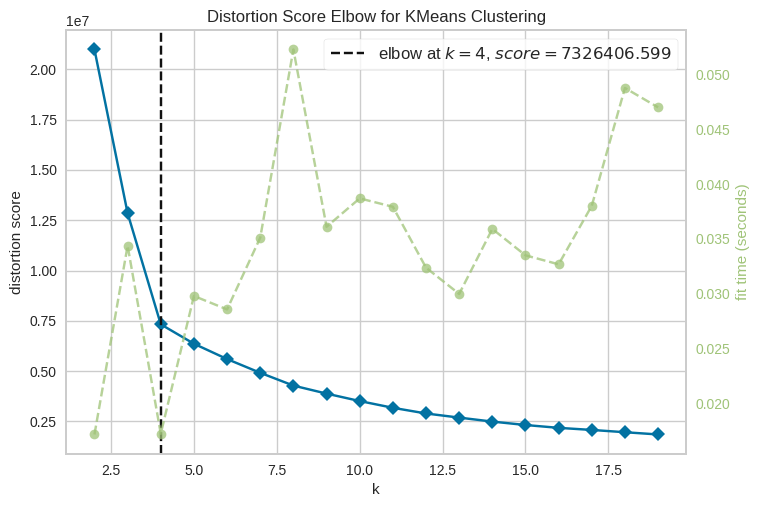

data_2_silhouette


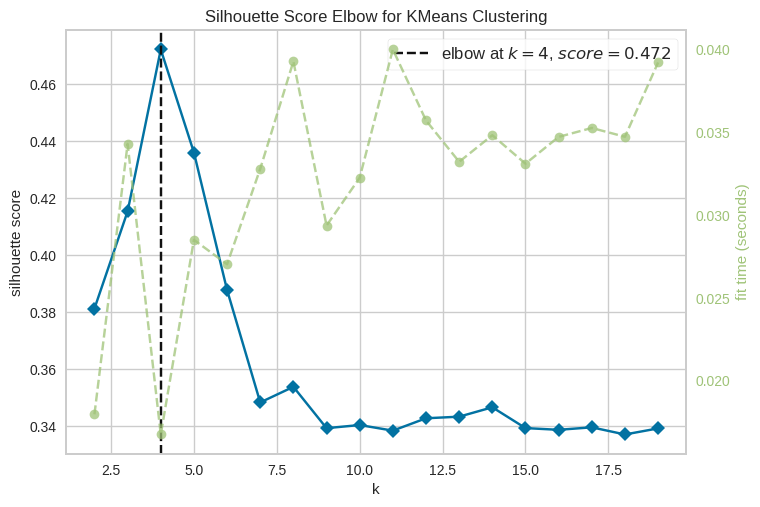

data_3_codo


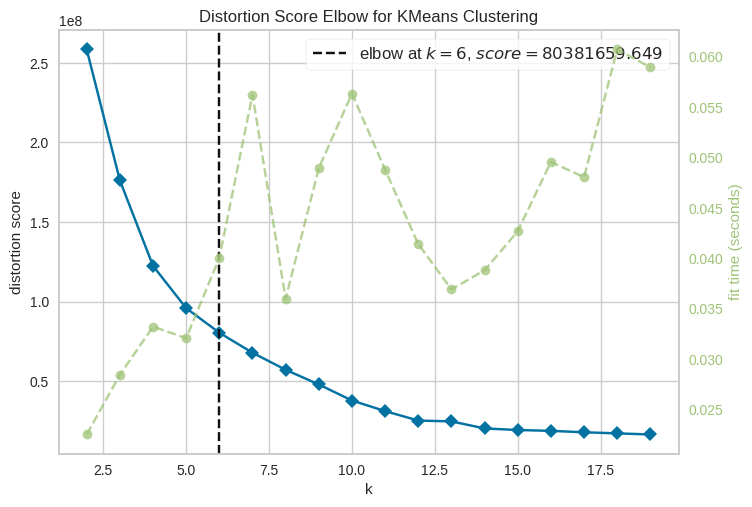

data_3_silhouette


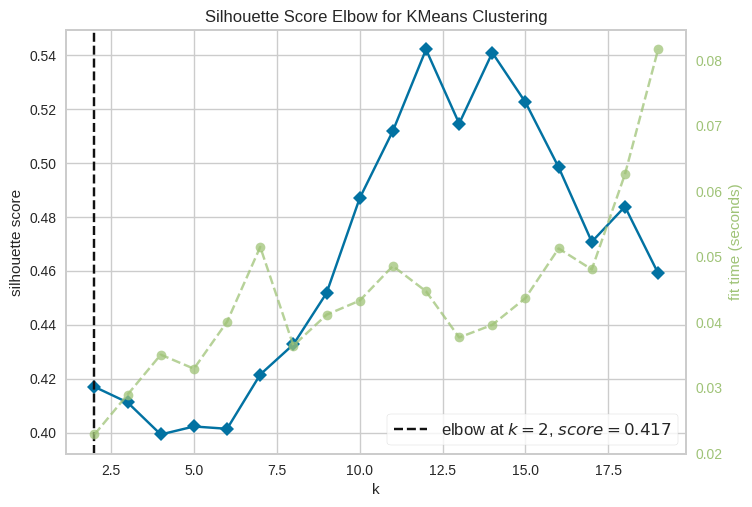

data_4_codo


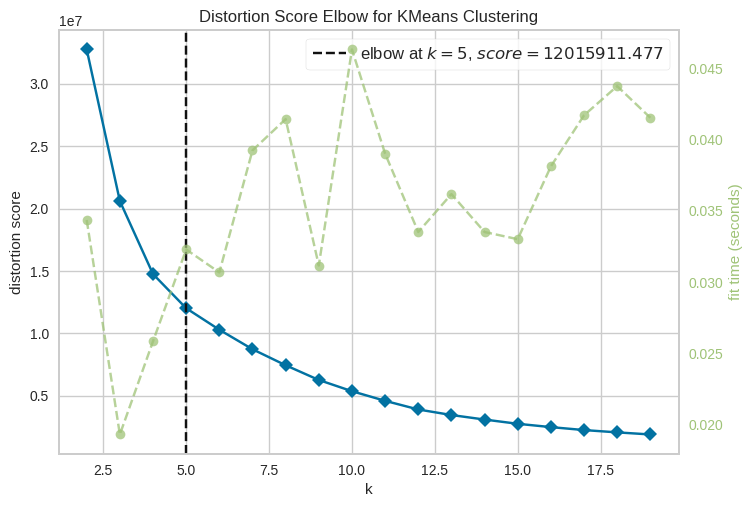

data_4_silhouette


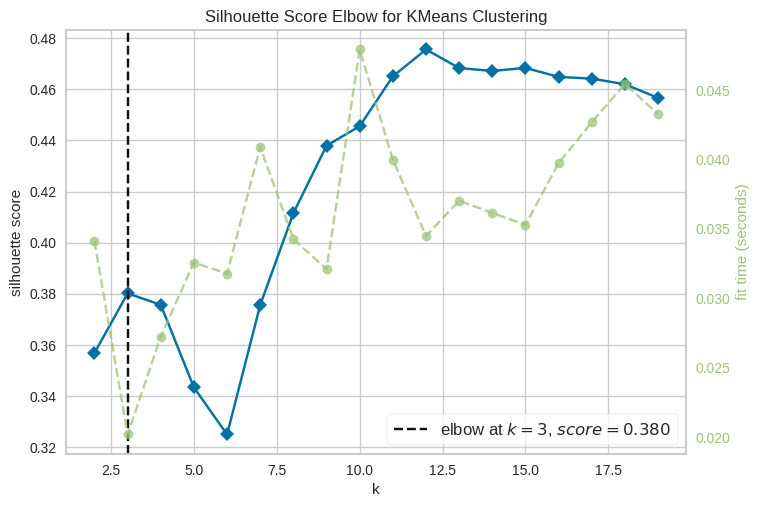

data_5_codo


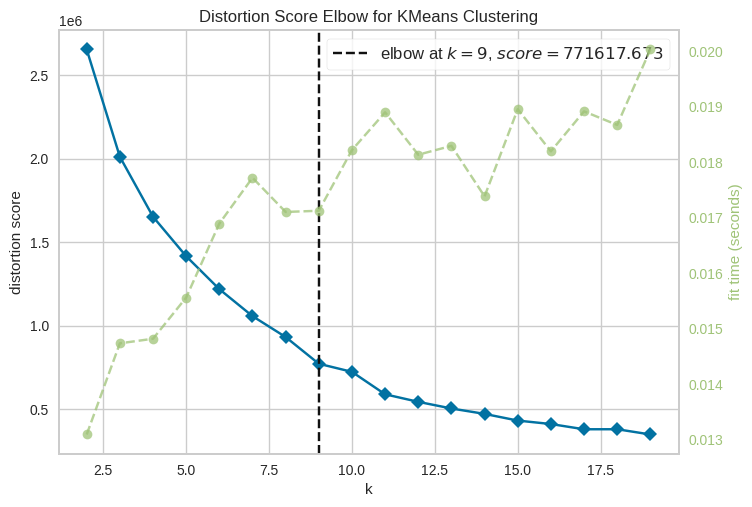

data_5_silhouette


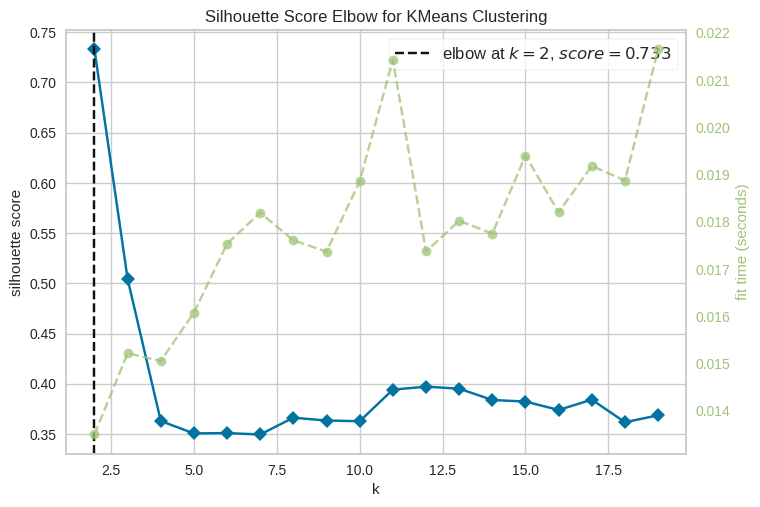

data_6_codo


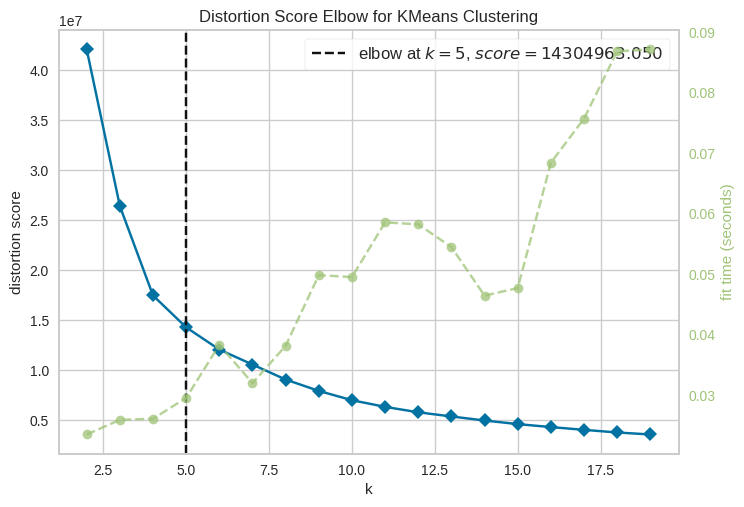

data_6_silhouette


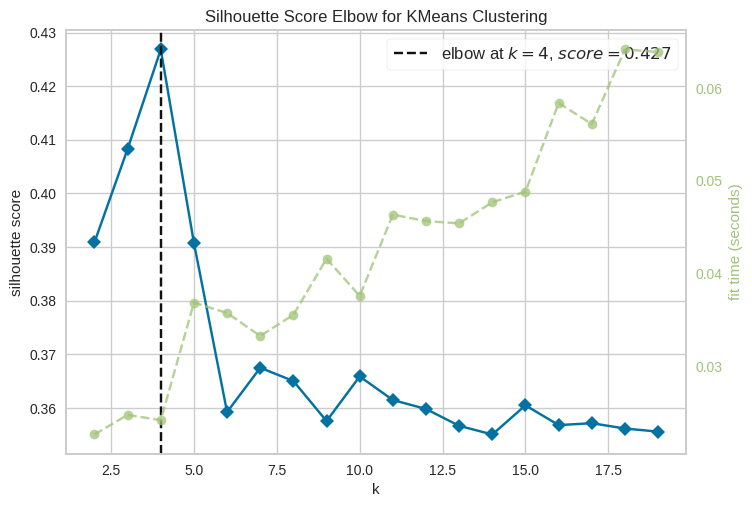

In [7]:
data_with_k={}
for i,data in datos.items():
    k_for_data={}
    k_for_data['codo']=k_mean(data,metric='distortion',name=f"data_{i+1}_codo")
    k_for_data['silhouette']=k_mean(data,metric='silhouette',name=f"data_{i+1}_silhouette")
    data_with_k[i]=k_for_data
    

In [8]:
def plot_k_means(data, index_data, k=2):
    model = KMeans(n_clusters=k, max_iter=100, init='random', n_init='auto', random_state=100).fit(data)
    
    data['Labels'] = model.labels_
    data['Labels'].value_counts()
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    sns.scatterplot(x='x', y='y', data=data, hue='Labels', palette=sns.color_palette('hls', k))
    axes.set_title('Data ' + str(index_data+1) + ' k=' + str(k))

def plot_all_strategy(data, i, method={}):
    for key, k in method.items():
        plot_k_means(data, i, k=k)

**Comentario:** A continuación,  veamos como agrupa KMeans los datos de los datasets dado el valor de k real:

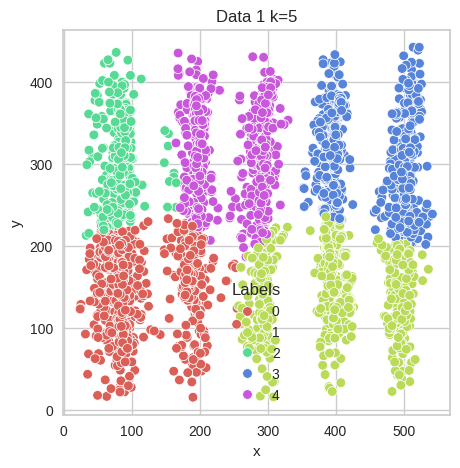

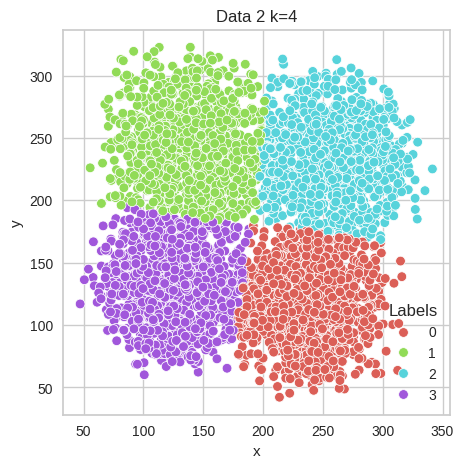

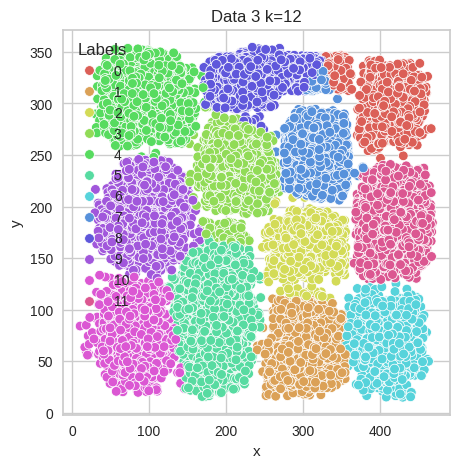

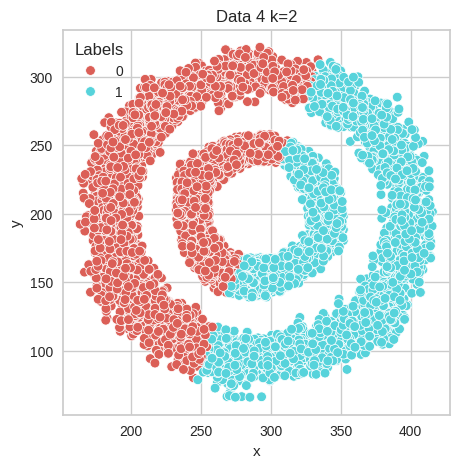

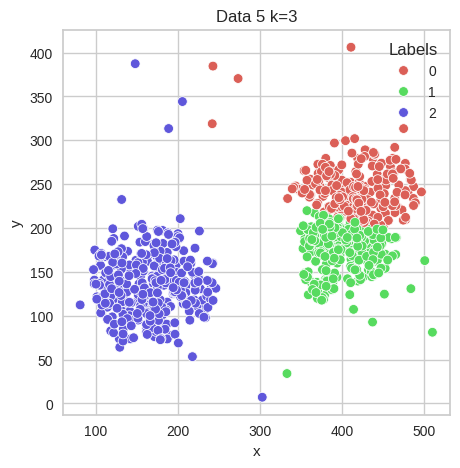

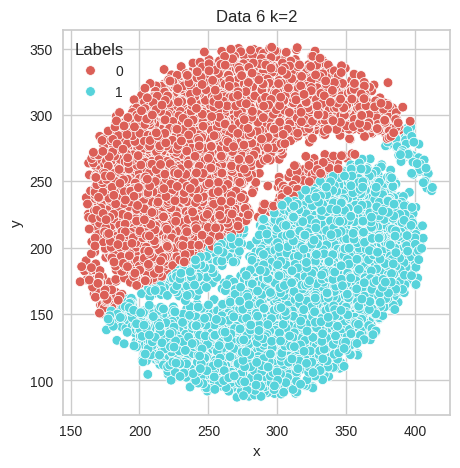

In [9]:
value_k=[5, 4, 12, 2, 3, 2]
for i, data in datos.items():
    plot_k_means(data.copy(), i, k=value_k[i])

**Comentario:** Ahora veamos los valores de k correspondientes a KElbowVisualizer para cada estrategia:

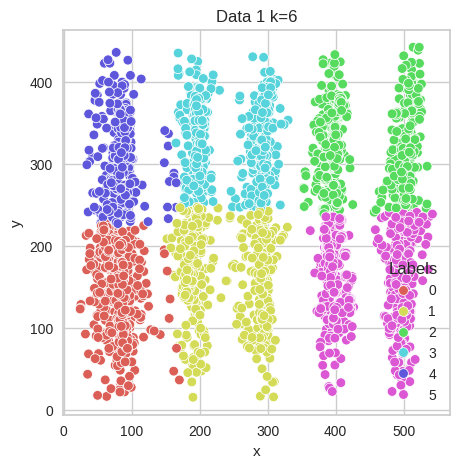

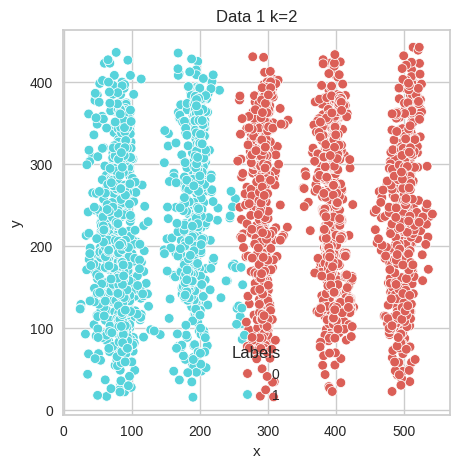

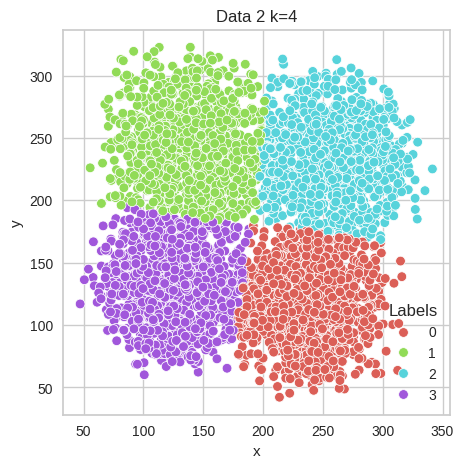

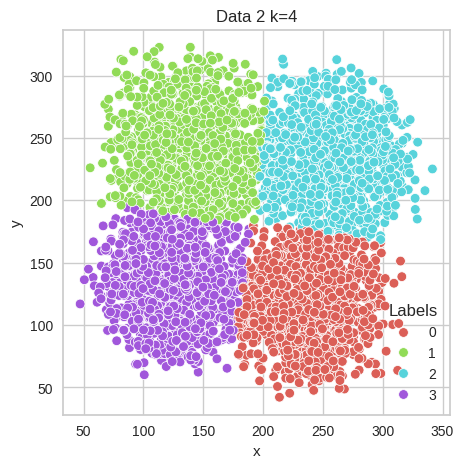

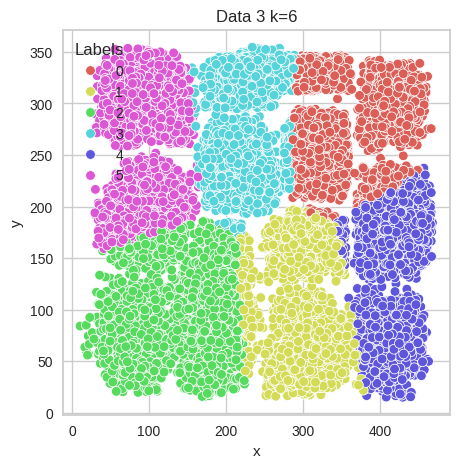

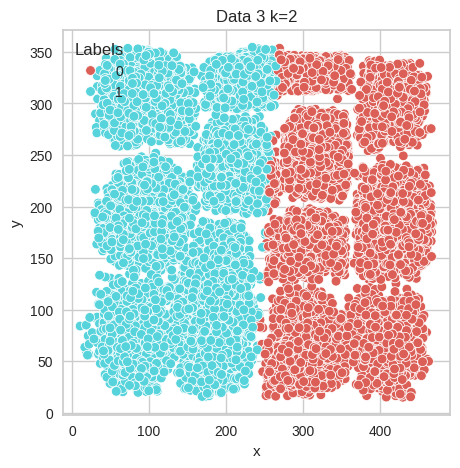

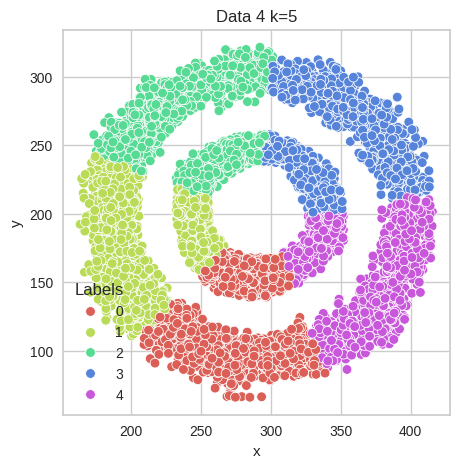

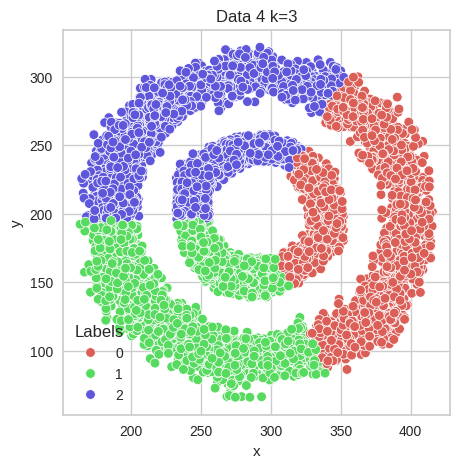

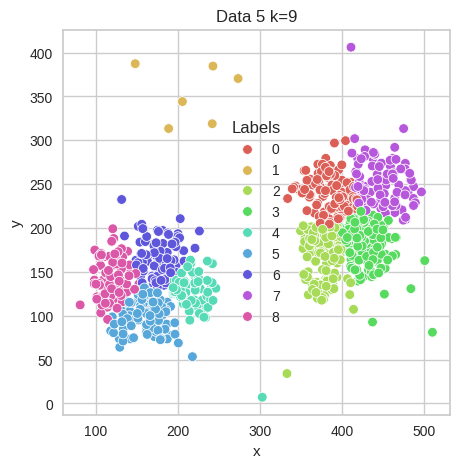

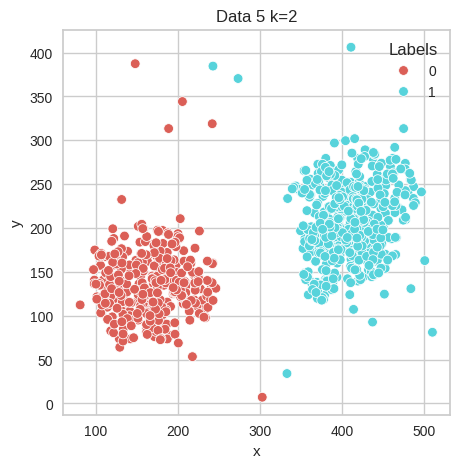

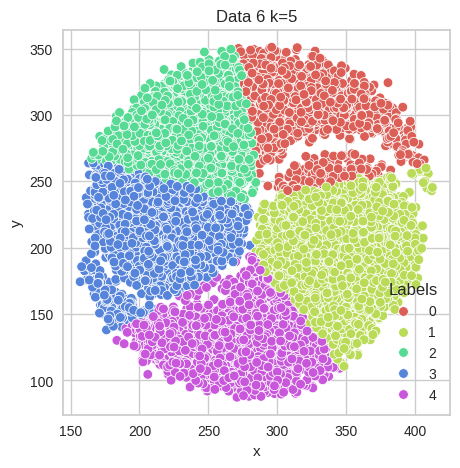

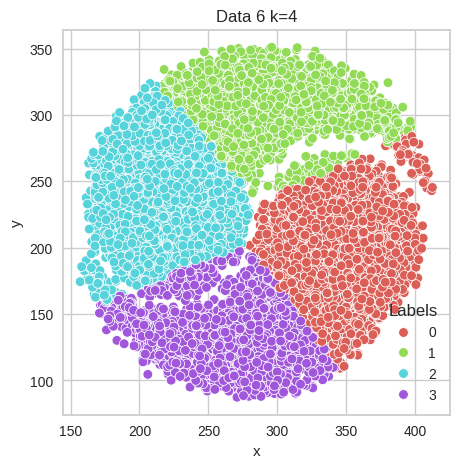

In [10]:
for i, data in datos.items():
    plot_all_strategy(data.copy(), i, method=data_with_k[i])

**Comentario:** Como en algunos casos el método de silhouette nos marcaba valores de k que no maximizaban el coeficiente de silhouette, veamos algunos casos en los que valores de k con dicho coeficiente más alto nos acercan más a la realidad de los grupos. 

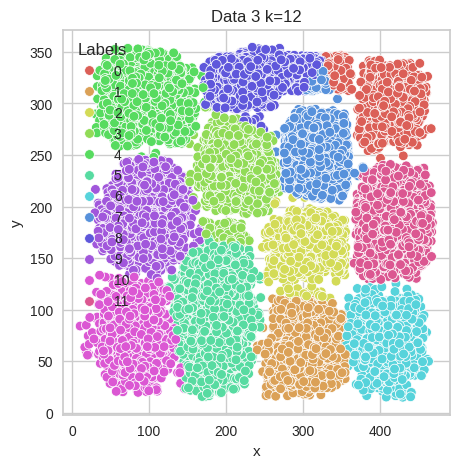

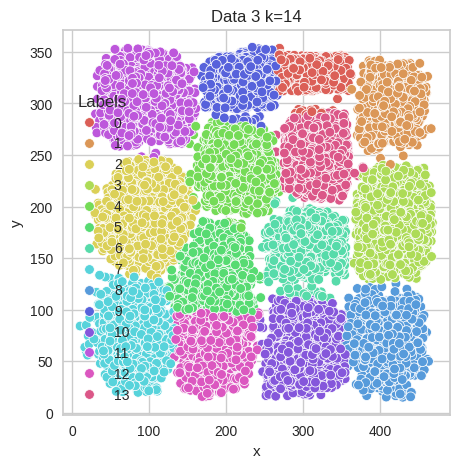

In [11]:
k_p=[[],[],[12,14],[],[],[]]

for i,data in datos.items():
    for k in k_p[i]:
        plot_k_means(data.copy(), i, k=k)

A continuación, comentaremos los resultados para cada dataset:
- **Dataset 1:** El método del codo nos marca el valor óptimo de k en k = 6 y el método de silhouette en k = 2 cuando el grupo de colores existente en la realidad es 5, es decir, 5 grupos. Ahora vemamos los siguientes casos:
    * Si agrupamos con KMeans con k=5, que es el número real de grupos, vemos que la aparienza de los grupos difiere mucho de la figura original, por lo que incluso con el número correcto de grupos KMeans no ha funcionado correctamente ya que los grupos no parecen muy coherentes. 
    * Si usamos ahora k=6 (método del codo), tampoco obtenemos grupos similares al original pero podemos notar un poco más de cercanía y coherencia en los grupos. 
    * Si usamos el resutado del método de Silhouette y k ahora vale 2, podemos ver que la forma de los grupos se asemeja más a los reales pero el problema en este caso es que sería un modelo bastante generalizado (faltan 3 grupos). 
- **Dataset 2:** El segundo dataset tiene un total de 4 grupos, y tanto el método del codo como el método de silhouette obtienen que idealmente k=4. Si observamos los grupos originales y los generados con KMeans vemos que son idénticos. 
- **Dataset 3:** Este dataset tiene 12 grupos. Con KMeans el método del codo nos da que k=6 y con el método de silhouette k=2. 
    * Si vemos la agrupación en 12 grupos de KMeans vemos como hay dos grupos que difieren ligeramente con los originales. 
    * Con el resultado del método del codo, k=6, los grupos parecen correctos aunque se diferencian fácilmente  subgrupos. 
    * Para k=2 que nos proporciona el método de silhouette, vemos que los dos grupos están claramente separados. Si nos fijamos en la gráfica de los coeficientes de silhouette para este dataset, vemos que hay dos valores  de k que maximizan dicho coeficiente que además se encuentran más cercanos al número real de grupos que son k=12 y k=14. Para k=12 mantenemos lo anteriormente comentado y para k=14 vemos como KMeadias ha hecho un mejor trabajo y ha identificado grupos más separables. 
- **Dataset 4:** Este cuarto conjunto de datos tiene 2 grupos, el método del codo ha obtenido un valor óptimo de k=5 y el método de silhouette k=3.
    * Para k=2, el número de grupos real, vemos que los grupos no se asemejan en absoluto a la realidad con KMeans aunque sí podemos considerarla una agrupación aceptable ya que los dos grupos son claramente separables. 
    * Para k=5 y k=3 pasa algo muy similar al caso anterior.
    * Este es uno de los ejemplos en los que KMeans no funciona correctamente ya que el dataset tiene una forma más compleja que los anteriores, por lo tanto, para ninguno de los valores anteriores de k KMeans ha hecho un buen agrupamiento. 
- **Dataset 5:** este conjunto de datos está formado por 3 grupos, uno de ellos mucho más pequeño que el resto. Con el método del codo se ha obtenido que k=9 y con el método de silhouette k=2. 
    * El agrupamiento por KMeans con k=3 ha dado un resultado totalmente difernte al real. Quizá se pueda deber a la inicialización aleatoria de los centroides. 
    * Con k=2, los grupos se asemejan mucho más a la realidad que con k=3.
    * Este es un claro ejemplo donde KMeans no funciona correctamente ya que los grupos son de diferente tamaño y densidad, concretamente dos de los grupos son densos y con más datos que el tercero que cuenta con muy pocos datos además de ser 'extremadamente' disperso. 
- **Dataset 6:** el dataset cuenta con 2 grupos pero con el método del codo se ha obtenido un valor de k=5 y con silhouette k=4.
    * Para dos grupos k=5 y k=4, obtenemos un resultado similar al dataset 4.
    * Este clúster también tiene una forma compleja además de ser no convexos, por lo que KMeans no fue capaz de hacer un buen agrupamiento para este dataset. 

### Ejercicio 2

Agrupa cada uno de los conjuntos de datos anteriores utilizando el k-medoides (usa la implementación de scikit-learn). 

Compara los resultados gráficamente respecto a los valores obtenidos por el conjunto de datos inicial. ¿En qué se diferencias los resultados de los obtenidos por el k-medias?

In [12]:
def k_medoids(data,metric='distortion',name='',max_iter=100):
    """
    Ags:
        metric, default: "distortion"
        Select the scoring metric to evaluate the clusters. The default is the mean distortion, defined by the sum of squared distances between each observation and its closest centroid. Other metrics include:
            distortion: mean sum of squared distances to centers
            silhouette: mean ratio of intra-cluster and nearest-cluster distance
            calinski_harabasz: ratio of within to between cluster dispersion
    """
    print(name)
    model = KMedoids(max_iter=max_iter, init='random', random_state=0)
    visualizer = KElbowVisualizer(model, k=(2,20), metric=metric)
    visualizer.fit(data)
    visualizer.show()
    if metric=="silhouette":
        argrelextrema(np.array(visualizer.k_scores_), np.greater)
        return visualizer.elbow_value_
    else:
        return visualizer.elbow_value_

data_1_codo


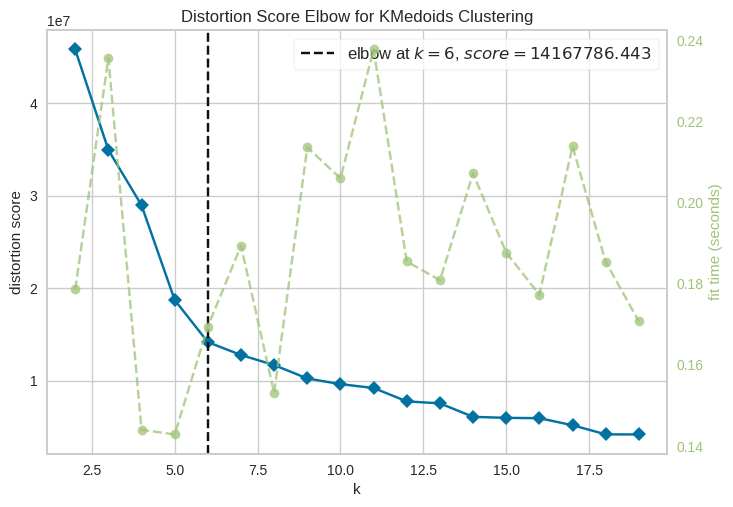

data_1_silhouette


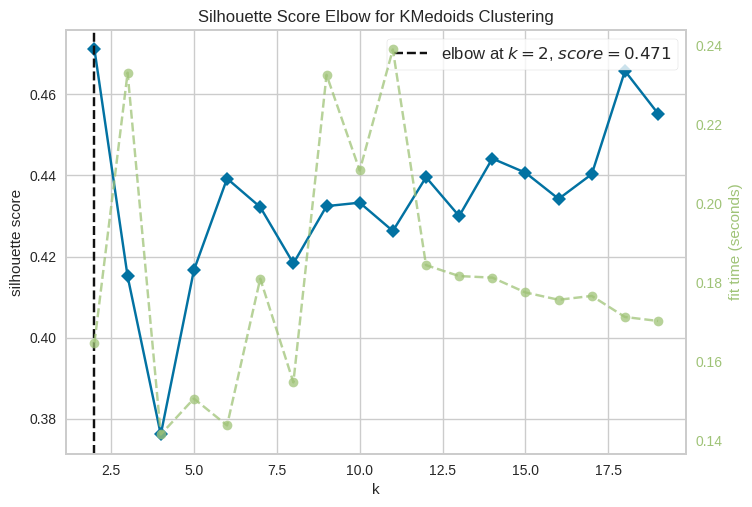

data_2_codo


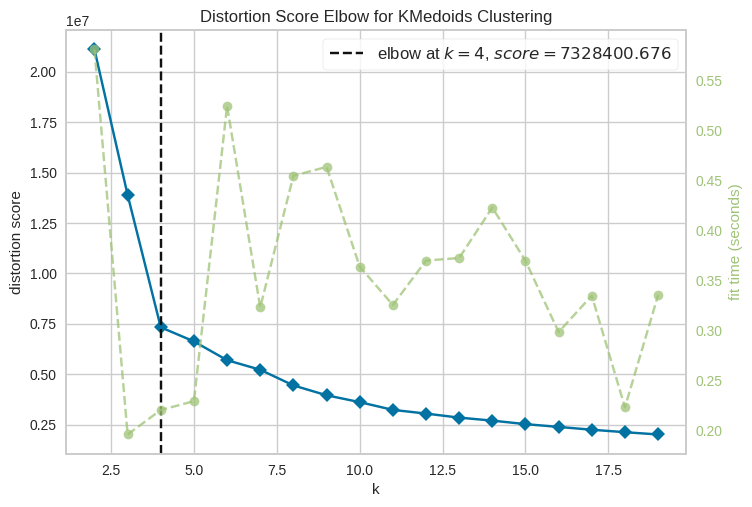

data_2_silhouette


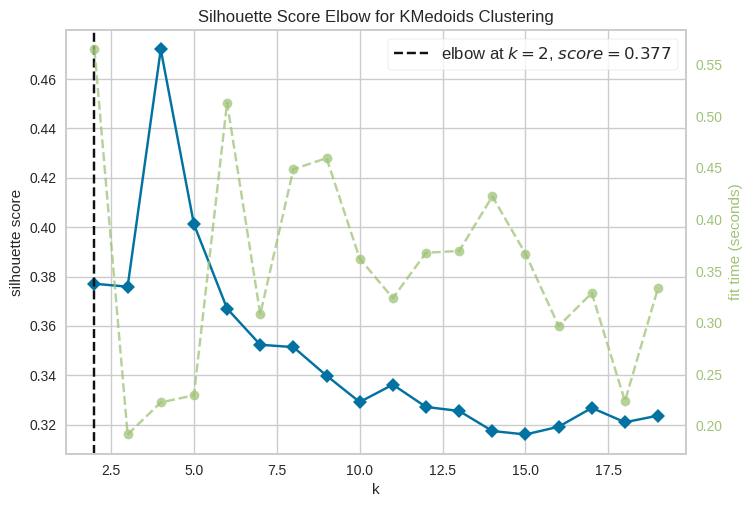

data_3_codo


In [ ]:
data_with_k={}
for i,data in datos.items():
    k_for_data={}
    k_for_data['codo']=k_medoids(data, metric='distortion',name=f"data_{i+1}_codo")
    k_for_data['silhouette']=k_medoids(data, metric='silhouette',name=f"data_{i+1}_silhouette")
    data_with_k[i]=k_for_data
    

In [ ]:
def plot_k_medoids(data, index_data, k=2):
    model = KMedoids(n_clusters=k, max_iter=100, init='random', random_state=100).fit(data)
    
    data['Labels'] = model.labels_
    data['Labels'].value_counts()
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    sns.scatterplot(x='x', y='y', data=data, hue='Labels', palette=sns.color_palette('hls', k))
    axes.set_title('Data ' + str(index_data+1) + ' k=' + str(k))

def plot_all_strategy_medoids(data, i, method={}):
    for key, k in method.items():
        plot_k_means(data, i, k=k)

**Comentario:** Valores k correspondientes con el numero de colores

In [ ]:
value_k=[5, 4, 12, 2, 3, 2]
for i,data in datos.items():
    plot_k_medoids(data.copy(), i, k=value_k[i])

**Comentario:** Valores k correspondientes a KElbowVisualizer  para cada estrategia

In [ ]:
for i,data in datos.items():
    plot_all_strategy_medoids(data.copy(), i, method=data_with_k[i])

**Comentario:** Valores k a la grafica de KElbowVisualizer para la estrategia de silhouette

In [ ]:
k_p=[[],[],[13],[],[],[]]

for i,data in enumerate(datos):
    for k in k_p[i]:
        plot_k_medoids(data.copy(),k=k)

Ahora veamos como se ha agrupado con KMedoids para cada conjunto de datos:
- **Dataset 1:** recordemos que este dataset tenía 5 grupos. El método del codo ha seleccionado k=6 como valor óptimo de k y silhouette ha seleccionado k=2. 
    * Si visualizamos los grupos construidos por KMedoids podemos ver que no coinciden con los reales ni con el agrupamiento de kmeans aunque sean bastante similares. 
    * Al igual que kmeans, para kmedoids el método del codo ha seleccionado k=6 pero el agrupamiento difiere por completo. 
    * Con k=2 sí coinciden los agrupamientos de ambos métodos. 
- **Dataset 2:** este dataset cuenta con 4 grupos, el método del codo ha seleccionado k=4 y el método de silhouette k=2. 
    * Para k=4, vemos como, al igual que kmeans, kmedoids también hace un correcto agrupamiento para este dataset. 
    * Para k=2 los grupos son separables por lo que no sería una agrupación incorrecta si fuese el número correcto de grupos. 
    * Por lo tanto, para este dataset, tanto kmeans como kmedoids son aptos para emplear. Si se tuviera que seleccionar uno de ellos este sería kmeans por su reducido tiempo de ejecución. 
- **Dataset 3:**  este dataset cuenta con 12 grupos, el método del codo ha seleccionado k=5 y el método de silhouette k=2.
    * Para k=12, el número real de grupos, vemos que kmeans ha hecho un mejor trabajo que kmedoids. Los grupos generados por kmeans se acercan mucho a los reales. 
    * Para k=5, los grupos se asemejan bastante a kmeans con k=6 pero ambos siguen estando muy lejos de la realidad.  
    * Para k=2, obtenemos el mismo resultado que kmeans para el valor seleccionado por el método de silhouette. En este caso si que debemos prestar atención a la gráfica de los coeficientes de silhouette ya que el valor máximo se alcanza para k=13, valor que se acerca mucho al número real de grupos. Si vemos la representación de los 13 grupos vemos como también se acerca a la realidad. 
    * Para este conjunto de datos ni kmeans ni kmedoids tuvieron éxito en el agrupamiento. 
- **Dataset 4:** este dataset cuenta con 2 grupos, el método del codo ha seleccionado k=7 y el método de silhouette k=3.
    * Para el número de grupos real, k=2, kmeans y kmedoids funcionaron igual.
    * Lo mismo ha ocurrido para el número de grupos seleccionados por el método del codo y silhouette.
    * Al igual que en kmeans, este conjunto de datos es mucho más complejo de lo que puede gestionar kmedoids o kmeans. 
- **Dataset 5**: este dataset cuenta con 3 grupos, el método del codo ha seleccionado k=8 y el método de silhouette k=2.
    * Para 3 grupos, vemos que al igual que kmeans no se ha agrupado correctamente. 
    * Para k=8, se aleja mucho de la realidad.
    * Para k=2, al igual que en kmedias, los grupos se parecen más a los grupos correctos. 
    * Igual que en kmeans, este dataset, al contar con un grupo mucho menos denso y mucho más disperso que los otros dos, kmedoids no ha funcionado correctamente. 
- **Dataset 6:**  este dataset cuenta con 2 grupos, el método del codo ha seleccionado k=5 y el método de silhouette k=4.
    * En este caso coinciden Kmeans y kmedoids por lo que ambos metodos no son eficaces a la hora de agrupar este tipo de conjunto de datos no convexos. 

Dados los resultados, si hubiese que elegir, se seleccionaría kmeans ya que, aparte de dar mejores resultados en algunos casos, kmedoids es mucho más costoso computacionalmente. 

### Ejercicio 3

[DBScan](https://nzlul.medium.com/clustering-method-using-k-means-hierarchical-and-dbscan-using-python-5ca5721bbfc3)

Agrupa cada uno de los conjuntos de datos anteriores utilizando el DBScan (usa la implementación de scikit-learn). Optimiza el valor de epsilon utilizando la regla del codo en un gráfico de k-distancias a los vecinos. Recuerda que el codo representa el punto donde la tasa de cambio de la distancia media de los k-vecinos más cercanos comienza a disminuir significativamente. Este punto se considera como un indicador del valor óptimo de epsilon. Fija MinPts a 4 (2 x dimensiones).


Compara los resultados gráficamente respecto a los valores obtenidos por el conjunto de datos inicial. ¿Mejoran los resultados del k-medias y del k-medoides?

In [ ]:
def plot_k_distances(data, min_pts=4, use_mean=False):
    """
    Calcula y grafica las distancias al k-ésimo vecino más cercano para cada punto en el conjunto de datos.
    
    Args:
        data: Conjunto de datos a analizar.
        min_pts: Número de puntos mínimos para considerar en la vecindad de un punto.
    """
    # Calcula las distancias al k-ésimo vecino más cercano
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    if use_mean:
        distances = np.mean(distances[:, 1:], axis=1) 

    # Ordena las distancias
    distances = np.sort(distances[:, -1], axis=0)
    
    # Grafica las distancias
    plt.figure(figsize=(12, 6))
    plt.plot(distances)
    plt.title(f'Distancia al {min_pts}-ésimo vecino más cercano')
    plt.xlabel('Punto')
    plt.ylabel(f'Distancia al {min_pts}-ésimo vecino')
    plt.show()


In [ ]:
for i,data in enumerate(datos):
    plot_k_distances(data)

In [ ]:
for i,data in enumerate(datos):
    plot_k_distances(data,use_mean=)

In [ ]:

def plot_DBSCAN(data,eps=2,min_pts=4):
    model  = DBSCAN(eps=eps, min_samples=min_pts).fit(data)
    
    data['Labels'] = model.labels_
    data['Labels'].value_counts()
    fig, axes = plt.subplots(1,1, figsize=(5,5))
    sns.scatterplot(x='x', y='y', data=data, hue='Labels', 
                palette=sns.color_palette('hls', eps))
    
def plot_all_strategy_DBSCAN(data,method={}):
    for key,k in method.items():
        print(key,k)
        plot_k_medoids(data,k=k)

In [ ]:
value_eps=[5,4,12,2,3,2] # ERROR, EPS NO ES EL NUM DE CLUSTERS POR ESO DA COSAS RARAS
for i,data in enumerate(datos):
    plot_DBSCAN(data.copy(),eps=value_eps[i])

## Notas profesor
Idea cargar datos hacer fitting y ver que os da y comparar con los resultar ver como se aproxima el clustering a los graficaos que muestra delante conjuntos de datos k melodies , y practicamente llegar a vuestras conclusiones.
